# Unit 20: More Variable Selection Methods

## <u>Case Study</u>: Finding a Parsimonious Model that Predicts Approval for the President's Foreign Policy

Finally, suppose we would lie to build a logistic regression model that will predict approval for the president's foreign policy. Out of four possible explanatory variables, we are interested to know which ones to include in our "final model" such that this final model is the most parsimonious.


## Data Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df = pd.read_csv('Feb17public.csv', 
                 na_values=missing_values)[['age', 'sex', 'q5cf1', 'party','sample']]

In [3]:
# and create binary reponse variable
df['y'] = df['q5cf1'].map({'Disapprove':0,'Approve':1})
# use cleaned data without records that have missing values
df = df.dropna()

In [4]:
df.shape

(679, 6)

In [5]:
df.head()

,age,sex,q5cf1,party,sample,y
1,70.0,Female,Disapprove,Democrat,Landline,0.0
2,69.0,Female,Disapprove,Independent,Landline,0.0
4,70.0,Female,Disapprove,Democrat,Landline,0.0
6,89.0,Female,Disapprove,Independent,Landline,0.0
7,92.0,Female,Approve,Republican,Landline,1.0


## 1. <u>Problem</u>: What are some algorithms that can help us *efficiently* identify models that have "high parsimony"?

#### See Unit 20 section 1

## 2. <u>One Idea</u>: Use Backwards Elimination or Forward Selection Algorithms

#### See Unit 20 section 2

### Ex. Let's use a backwards elimination algorithm with <u>BIC</u> to try to find a most parsimonious model that predicts support for the president's foreign policy.

Remember, the lower a model's BIC score is, the more parsimonious we consider the model to be. Therefore, our goal for using this algorithm should be to find the model that has the lowest BIC score.

### <u>Iteration 1 of Backwards Elimination</u>

#### 1.1. First, let's fit the "current model" with ALL four possible explanatory variables and find the BIC score of this "current model".

In [6]:
current_mod=smf.logit('y~age+sex+party+sample', data=df).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.419629
         Iterations 7
ITERATION 1: BIC of the Current Model 622.021657116503


#### 1.2. Next, let's fit four test models and calculate the BIC score for that model, for each test model we delete one of the possible explanatory variables from the "current model".

In [7]:
#Test model that deletes party
test_mod=smf.logit('y~age+sex+sample', data=df).fit()
print('BIC of Test Model that Deletes PARTY from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.616481
         Iterations 5
BIC of Test Model that Deletes PARTY from the Current Model 863.2637843537823


In [8]:
#Test model that deletes sex
test_mod=smf.logit('y~age+party+sample', data=df).fit()
print('BIC of Test Model that Deletes SEX from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.427991
         Iterations 7
BIC of Test Model that Deletes SEX from the Current Model 626.8558806309322


In [9]:
#Test model that deletes age
test_mod=smf.logit('y~sex+party+sample', data=df).fit()
print('BIC of Test Model that Deletes AGE from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.433090
         Iterations 7
BIC of Test Model that Deletes AGE from the Current Model 633.7801450903344


In [10]:
#Test model that deletes sample
test_mod=smf.logit('y~age+sex+party', data=df).fit()
print('BIC of Test Model that Deletes SAMPLE from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7
BIC of Test Model that Deletes SAMPLE from the Current Model 615.5280340677227


#### 1.3. Because there was at least one "test model" that has a BIC score (615.53) that is lower than the BIC score of the current model (622.02), we continue on to step 4 in the algorithm.

#### 1.4. The "test model" (from step 2) that had the lowest BIC score was the one that deleted the "sample" explanatory variable from the "current model". So we set the new "current model" to be the test model that does not include "sample" and we go back to step (2). We can call this a new iteration of the algorithm.

###  <u>Iteration 2 of Backwards Elimination</u>

In [11]:
current_mod=smf.logit('y~age+sex+party', data=df).fit()
print('ITERATION 2: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7
ITERATION 2: BIC of the Current Model 615.5280340677227


#### 2.2. Next, let's fit three test models and calculate the BIC score for that model, for each test model we delete one of the possible explanatory variables from the "current model".

In [12]:
#Test model that deletes party
test_mod=smf.logit('y~age+sex', data=df).fit()
print('BIC of Test Model that Deletes PARTY from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.616503
         Iterations 5
BIC of Test Model that Deletes PARTY from the Current Model 856.7724827293513


In [13]:
#Test model that deletes sex
test_mod=smf.logit('y~age+party', data=df).fit()
print('BIC of Test Model that Deletes SEX from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.428186
         Iterations 7
BIC of Test Model that Deletes SEX from the Current Model 620.600002907382


In [14]:
#Test model that deletes age
test_mod=smf.logit('y~sex+party', data=df).fit()
print('BIC of Test Model that Deletes AGE from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.434714
         Iterations 7
BIC of Test Model that Deletes AGE from the Current Model 629.4647062516452


#### 2.3. Because there were no "test models" that had a lower than the BIC score of the current model (615.53), we STOP THE ALGORITHM and we return the "current model" (with age, sex, and party as explanatory variables) as our "final model."

In [15]:
final_mod=smf.logit('y~age+sex+party', data=df).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                  0.3614
Time:                        22:29:49   Log-Likelihood:                -284.94
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.185e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5635      0.465     -9.807      0.000      -5.475      -3.651
sex[T.Male]                       0.7288      0.217      3.363      0.001       0.304       1.154
party[T.Independent]              2.2604      0.312      7.236      0.000       1.648       2.873
party[T.No preference (VOL.)]     2.5881      0.680      3.808      0.000       1.256       3.920
party[T.Other party (VOL.)]       4.0865      1.212      3.372      0.001       1.711       6.462
party[T.Republican]               4.2985      0.341     12.592      0.000       3.629       4.968
age                               0.0272      0.006      4.443      0.000       0.015       0.039
=================================================================================================
"""

#### <u>Final Interpretation</u>

What this means is that the final model with just sex, age, and party as explanatory variables is more parsimonious than the model with sample, sex, age, and party, because this final model had a lower BIC score.

**However, we do not know for sure that the model with sex, age, and party has the LOWEST BIC score out of all possible $2^4=16$ possible models combinations that use (or do not use) the four possible explanatory variables that we originally considered!**

## 3. <u>Another Idea</u>: Use a Regularization Term in your Regression Model

#### See Unit 20 section 3

### 3.1. <u>Recap</u> of Non-Regularized Logistic Regression Models and AIC/BIC

#### See Unit 20 section 3.1.

### 3.2. <u>Regularization Term 1</u>: Ridge Regression (L2 Penalty)

#### See Unit 20 section 3.2.

### 3.3. <u>Regularization Term 2</u>: LASSO (L1 Penalty)

#### See Unit 20 section 3.3.

### 3.4. Comparing LASSO (L1) Penalty to the Ridge Regression (L2) Penalty

#### See Unit 20 section 3.4.

### 3.5. <u>Regularization Term 3</u>: Elastic Net (L2 and L1 Penalty Combination)

#### See Unit 20 section 3.5.





### 3.6. <u>Exercise</u>: Let's fit a four types of logistic regression model that predicts the likelihood that an adult living in the U.S. supports the president's foreign policy using the following explanatory variables:
* age
* sex
* party
* sample (whether they were contacted for the survey via cellphone or landline)

### Specifically, let's fit the following four types of logistic regression models to the *entire dataframe*.
1. Basic (ie. non-regularized) Logistic Regression (ie. no penalty)
2. Logistic Regression with L1 penalty (ie. LASSO Logistic Regression)
3. Logistic Regression with L2 penalty (ie. Ridge Logistic Regression)
4. Elastic Net Logistic Regression (Combination of L1 and L2 penalty)

#### 3.6.1 New package and function

In order to fit **regularized** logistic regression models, we need to use the **LogisticRegression()** function which is from the **sklearn.linear_model** package.

In [16]:
from sklearn.linear_model import LogisticRegression

#### 3.6.2. Machine Learning Input for the LogisticRegression() Function

In addition, the **LogisticRegression()** function takes a different type of inputs and has a different format than what the **ols.logit()** function uses.



First, we need to separate the explanatory variables into a dataframe by themselves which we call a **features matrix, X**.

In [17]:
X = df.drop(columns=['y','q5cf1'])
X.head()

,age,sex,party,sample
1,70.0,Female,Democrat,Landline
2,69.0,Female,Independent,Landline
4,70.0,Female,Democrat,Landline
6,89.0,Female,Independent,Landline
7,92.0,Female,Republican,Landline


Next, we need to convert the categorical *explanatory variables* to indicator variables "ourselves", or by using the pandas **pd.get_dummies()** function.

Notice how:
* the "age" variable remains in the dataframe,
* the "sex", "party", and "sample" variables were dropped, 
* and we now have an indicator variable for all but one of the levels for each of our categorical explanatory variables.

The **drop_first=True** parameter, tells the **pd.get_dummies()** function to *not* create an indicator variable for one level of each categorical variable.

In [18]:
X=pd.get_dummies(X, drop_first=True)
X.head()

,age,sex_Male,party_Independent,party_No preference (VOL.),party_Other party (VOL.),party_Republican,sample_Landline
1,70.0,0,0,0,0,0,1
2,69.0,0,1,0,0,0,1
4,70.0,0,0,0,0,0,1
6,89.0,0,1,0,0,0,1
7,92.0,0,0,0,0,1,1


And finally, we need to separate the 0/1 response variable values into a series by itself, which we calls the **target array, y**.

In [19]:
y=df['y']
y

1       0.0
2       0.0
4       0.0
6       0.0
7       1.0
       ... 
1494    1.0
1498    1.0
1499    1.0
1501    0.0
1502    1.0
Name: y, Length: 679, dtype: float64

#### 3.6.3 Basic (non-regularized) Logistic Regression (no penalties)

First, let's fit a non-regularized logistic regression model with the following additional function parameters.

* **penalty**: By selecting 'none' for the penalty, we are indicating that we are just using a basic (non-regularized) logistic regression model.
* **solver**: We will use the the 'newton-cg' solver. The newton-cg algorithm is a type of numerical analysis algorithm that goes about finding an optimal solution to a given objective function.
* **max_iter**: This algorithm stops after 1000 iterations or when the algorithm has converged.


<u>Additional Information</u>: The 'newton-cg' solver only works for: basic logistic regression and ridge regression.


In [20]:
clf0 = LogisticRegression(penalty='none', solver='newton-cg', 
                          max_iter=1000)
clf0.fit(X,y)

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

#### 3.6.4. LASSO (L1 penalty) Logistic Regression

Next, let's fit a LASSO (L1 penalty) Logistic Regression model with the following additional function parameters.

* **penalty**: By selecting 'l1' for the penalty, we are fitting a LASSO (L1 penalty) logistic regression.
* **solver**: We will use the the 'liblinear' solver. The liblinear is a tool that solves linear logistic regression optimization problems.
* **max_iter**: This algorithm stops after 1000 iterations or when the algorithm has converged.
* **C:** This value is set to be $\frac{1}{\lambda}$. Thus if we want our $\lambda=3$ in this model, we need to set $C=\frac{1}{\lambda}=\frac{1}{3}$.

<u>Additional Information</u>: The 'liblinear' solver only works for: LASSO logistic regression and logistic ridge regression.

In [21]:
clf1 = LogisticRegression('l1', solver='liblinear', 
                          max_iter=1000, C=1/3)
clf1.fit(X,y)

LogisticRegression(C=0.3333333333333333, max_iter=1000, penalty='l1',
                   solver='liblinear')

#### 3.6.5. Ridge Regression (L2 penalty) Logistic Regression

Next, let's fit a Logistic Ridge Regression (L2 penalty) model with the following additional function parameters.

* **penalty**: By selecting 'l2' for the penalty, we are fitting a logistic ridge regression (L2 penalty) model.
* **solver**: We will use the the 'liblinear' solver. The liblinear is a tool that solves linear logistic regression optimization problems.
* **max_iter**: This algorithm stops after 1000 iterations or when the algorithm has converged.
* **C:** This value is set to be $\frac{1}{\lambda}$. Thus if we want our $\lambda=3$ in this model, we need to set $C=\frac{1}{\lambda}=\frac{1}{3}$.

<u>Additional Information</u>: The 'liblinear' solver only works for: LASSO logistic regression and logistic ridge regression.

In [22]:
clf2 = LogisticRegression('l2', solver='liblinear', 
                          max_iter=1000, C=1/3)
clf2.fit(X,y)

LogisticRegression(C=0.3333333333333333, max_iter=1000, solver='liblinear')

#### 3.6.6. Elastic Net (L1 and L2 penalty combination) Logistic Regression

Next, let's fit an Elastic Net Logistic Regression model (L1 and L2 penalty) with the following additional function parameters.

* **penalty**: By selecting 'elasticnet' for the penalty, we are fitting an elastic net (L1 and L2 penalty) model.
* **solver**: We will use the the 'saga' solver. aga is a numerical optimization method that only works for specific types of objective functions.
* **max_iter**: This algorithm stops after 1000 iterations or when the algorithm has converged.
* **C:** This value is set to be $\frac{1}{\lambda}$. Thus if we want our $\lambda=3$ in this model, we need to set $C=\frac{1}{\lambda}=\frac{1}{3}$.
* The $\alpha$ in sklearn is represented as the "l1_ratio" parameter in the function. With an $\alpha=$l1_ratio=0.7, this means that this particular elastic net model will favor solutions that more closely resemble the LASSO model results than the ridge regression model results.

<u>Additional Information</u>: The 'saga' solver only works for: elastic net logistic regression.




In [23]:
clf3 = LogisticRegression('elasticnet', solver='saga', 
                          max_iter=1000, l1_ratio=0.7, C=1/3)
clf3.fit(X,y)

C:\Users\vellison\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3333333333333333, l1_ratio=0.7, max_iter=1000,
                   penalty='elasticnet', solver='saga')

#### 3.6.7 Now, let's extract and examine the 7 resulting slopes for each of the 4 models we just fitted.

For instance, below are the slopes for the elastic net model.

In [24]:
clf3.coef_

array([[0.01387743, 0.56660825, 1.02616927, 0.09267267, 0.02023501,
        2.95058127, 0.        ]])

And below is the intercept for the elastic net model.

In [25]:
clf3.intercept_

array([-2.70654499])

In [26]:
dfcoef = pd.DataFrame(
    np.concatenate((clf0.coef_.T, 
                    clf1.coef_.T, 
                    clf2.coef_.T, 
                    clf3.coef_.T), 
                   axis=1),
        columns=['Non_Regularized', 'LASSO', 'Ridge_Regression', 'Elastic_Net'], index=X.columns)
dfcoef

,Non_Regularized,LASSO,Ridge_Regression,Elastic_Net
age,0.027556,0.017372,0.010142,0.013877
sex_Male,0.725143,0.586283,0.548167,0.566608
party_Independent,2.263231,1.377441,1.030012,1.026169
party_No preference (VOL.),2.591156,0.410129,0.647457,0.092673
party_Other party (VOL.),4.082109,0.000000,0.634710,0.020235
party_Republican,4.299563,3.380921,2.881765,2.950581
sample_Landline,-0.042271,0.000000,0.041545,0.000000


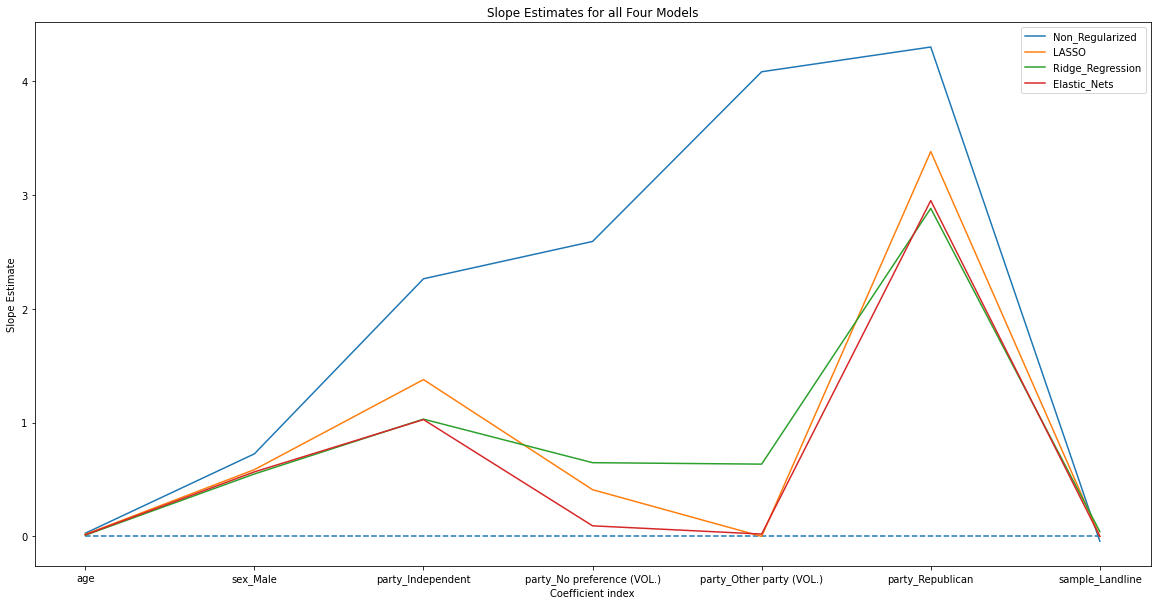

In [27]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.plot(dfcoef.index, dfcoef[dfcoef.columns[i]])
plt.xticks(np.arange(0,7,1))
plt.xlabel('Coefficient index')
plt.ylabel('Slope Estimate')
plt.title('Slope Estimates for all Four Models')
plt.legend(['Non_Regularized','LASSO','Ridge_Regression','Elastic_Nets'], bbox_to_anchor=(1,1))
plt.hlines(y=0, xmin=0, xmax=6, linestyles='--')
plt.show()

In [28]:
X.columns

Index(['age', 'sex_Male', 'party_Independent', 'party_No preference (VOL.)',
       'party_Other party (VOL.)', 'party_Republican', 'sample_Landline'],
      dtype='object')

**<u>General  Model Interpretation</u>:**

* In general, the slopes in the **non-regularized logistic regression model** were higher than the slopes for the other three models. This is what we would expect as the other three models have a penalty for having slopes that are high.
* The **LASSO** model has the most amount of slopes that are set to be *exactly* zero. This is what we would expect from the LASSO model, as this model favors more slopes that are set to be *exactly* 0.
* The **elastic net** model has a slope that is exactly 0 and one that is very close to being 0. This is somewhat what we would expect as we set the $\alpha$ to be closer to 1, so we would expect *this* particular elastic net's slopes to resemble the type of results that we would get with a LASSO model, which tends to have more slopes set exactly equal to 0.
* The **ridge regression model** has no slopes that are set to be exactly 0, but has much smaller slopes than the non-regularized model. This is what we expect from a ridge regression model, that does not favor slopes that are set to be exactly equal to 0.

**<u>Individual Slope Interpretation</u>:**

* The **age** and **sex:Male** slopes do not change dramatically in all four models. This gives us no indication that this model should be deleted in a reduced model.
* The **sample_Landline** slope is set to be exactly 0 in the **LASSO** model and the **elastic net model**. This is a large change from the slope that we see in the **non-regularized model**. So this gives us an indication that we should not include the **sample** slope in the reduced model**
* Finally, the **party_Other party (VOL.)** slope is set to be exactly 0 in the **LASSO** model and is very close to 0 in the **elastic net model**. This is a large change from the slope that we see in the **non-regularized model**. However, we don't see much change in the other party variables. Because we cannot delete an indicator variable without the other corresponding indicator variables (for a given explanatory variable), we will leave the party slope in the reduced model.

#### 3.6.8. Using these results to create a reduced model(s) and a full model.

Our analysis from 3.6.7 gave us some indications as to what reduced models we should test. 

**Full Model**
We can go back to using the **smf.logit()** function to learn more about the full logistic regression model (that uses all four explanatory variables we were considering). Unlike the **LogisticRegression()** function, the **smf.logit()** function will give us more information about the model including:
* BIC/AIC
* p-values for conducting inference on the slopes
* the optimal log-likelihood function value of the model.

In [29]:
full_mod=smf.logit('y~age+sex+party+sample', data=df).fit()
full_mod.summary()

Optimization terminated successfully.
         Current function value: 0.419629
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      671
Method:                           MLE   Df Model:                            7
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                  0.3615
Time:                        22:29:50   Log-Likelihood:                -284.93
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 8.965e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5713      0.468     -9.771      0.000      -5.488      -3.654
sex[T.Male]                       0.7251      0.218      3.329      0.001       0.298       1.152
party[T.Independent]              2.2632      0.313      7.234      0.000       1.650       2.876
party[T.No preference (VOL.)]     2.5912      0.680      3.813      0.000       1.259       3.923
party[T.Other party (VOL.)]       4.0821      1.212      3.367      0.001       1.706       6.458
party[T.Republican]               4.2996      0.341     12.592      0.000       3.630       4.969
sample[T.Landline]               -0.0423      0.257     -0.164      0.870      -0.547       0.462
age                               0.0276      0.007      4.207      0.000       0.015       0.040
=================================================================================================
"""

In [30]:
print('Full Model AIC:',full_mod.aic)
print('Full Model BIC:',full_mod.bic)

Full Model AIC: 585.8566880960334
Full Model BIC: 622.021657116503


**Reduced Model**
Our regularized models indicated that the **sample** explanatory variable might be a useful variable to leave out of the reduced model for testing. We fit this model below, (now just using a non-regularized logistic regression model), and find the AIC and BIC of this reduced model.

In [31]:
red_mod=smf.logit('y~age+sex+party', data=df).fit()
red_mod.summary()

Optimization terminated successfully.
         Current function value: 0.419649
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  679
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                  0.3614
Time:                        22:29:50   Log-Likelihood:                -284.94
converged:                       True   LL-Null:                       -446.23
Covariance Type:            nonrobust   LLR p-value:                 1.185e-66
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.5635      0.465     -9.807      0.000      -5.475      -3.651
sex[T.Male]                       0.7288      0.217      3.363      0.001       0.304       1.154
party[T.Independent]              2.2604      0.312      7.236      0.000       1.648       2.873
party[T.No preference (VOL.)]     2.5881      0.680      3.808      0.000       1.256       3.920
party[T.Other party (VOL.)]       4.0865      1.212      3.372      0.001       1.711       6.462
party[T.Republican]               4.2985      0.341     12.592      0.000       3.629       4.968
age                               0.0272      0.006      4.443      0.000       0.015       0.039
=================================================================================================
"""

In [32]:
print('Reduced Model AIC:',red_mod.aic)
print('Reduced Model BIC:',red_mod.bic)

Reduced Model AIC: 583.8836861748118
Reduced Model BIC: 615.5280340677227


We can see that the reduced model had a lower AIC and BIC score than the full model does. Therefore, the regularized regression models gave us some useful insights as to which explanatory variables to leave out of our reduced model(s).

We then compared this reduced model to our full model to verify that this reduced model (without the sample explanatory variable) was more parsimonious than the full model.

We might use this insight to make the reduced model, our final model.

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign